In [2]:
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

In [4]:
# load data
data = load_wine()
print(type(data))
print(issubclass(type(data), dict)) # Bunch型は辞書dictのサブクラス
print(data.keys())

# 説明変数のデータを取得 and DataFrameをInitialize
df_X = pd.DataFrame(data['data'], columns=data['feature_names'])
df_X.head()

<class 'sklearn.utils.Bunch'>
True
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [13]:
# サンプルとして使用するカラムを2つ抽出
df_X.columns
sample_col = ['flavanoids','od280/od315_of_diluted_wines']
x_sample = df_X[sample_col].values

x_sample


array([[3.06, 3.92],
       [2.76, 3.4 ],
       [3.24, 3.17],
       [3.49, 3.45],
       [2.69, 2.93],
       [3.39, 2.85],
       [2.52, 3.58],
       [2.51, 3.58],
       [2.98, 2.85],
       [3.15, 3.55],
       [3.32, 3.17],
       [2.43, 2.82],
       [2.76, 2.9 ],
       [3.69, 2.73],
       [3.64, 3.  ],
       [2.91, 2.88],
       [3.14, 2.65],
       [3.4 , 2.57],
       [3.93, 2.82],
       [3.03, 3.36],
       [3.17, 3.71],
       [2.41, 3.52],
       [2.88, 4.  ],
       [2.37, 3.63],
       [2.61, 3.82],
       [2.68, 3.2 ],
       [2.94, 3.22],
       [2.19, 2.77],
       [2.97, 3.4 ],
       [2.33, 3.59],
       [3.25, 2.71],
       [3.19, 2.88],
       [2.69, 2.87],
       [2.74, 3.  ],
       [2.53, 2.87],
       [2.98, 3.47],
       [2.68, 2.78],
       [2.43, 2.51],
       [2.64, 2.69],
       [3.04, 3.53],
       [3.29, 3.38],
       [2.68, 3.  ],
       [3.56, 3.56],
       [2.63, 3.  ],
       [3.  , 3.35],
       [2.65, 3.33],
       [3.17, 3.44],
       [3.39,

Text(0, 0.5, 'od280/od315_of_diluted_wines')

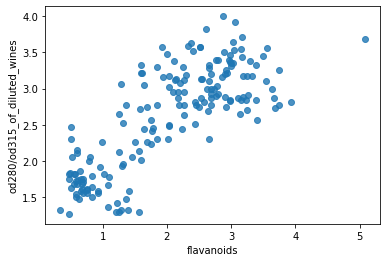

In [14]:
plt.scatter(x=x_sample[:,0], y=x_sample[:,1], alpha=0.8)
plt.xlabel(sample_col[0])
plt.ylabel(sample_col[1])

# skleanのPCA()

In [19]:
# PCAの実行
pca_object = PCA()
pca_object.fit(X=x_sample)
# 元データを主成分空間に写像(=主成分得点に変換??)
x_projected = pca_object.transform(X=x_sample)
x_projected

array([[ 1.57769811e+00, -5.33817196e-01],
       [ 1.04253035e+00, -2.61796115e-01],
       [ 1.31923404e+00,  1.92885167e-01],
       [ 1.68152865e+00,  9.46883482e-02],
       [ 7.27380192e-01,  9.38446802e-02],
       [ 1.27029481e+00,  5.42892241e-01],
       [ 9.39650926e-01, -5.43604247e-01],
       [ 9.31271312e-01, -5.49061542e-01],
       [ 9.26730639e-01,  3.19143147e-01],
       [ 1.45119473e+00, -1.74655822e-01],
       [ 1.38627096e+00,  2.36543527e-01],
       [ 4.49479982e-01,  4.41307652e-02],
       [ 7.69665605e-01,  1.57184587e-01],
       [ 1.45619570e+00,  8.07166459e-01],
       [ 1.56164459e+00,  5.53630405e-01],
       [ 8.84445226e-01,  2.55803240e-01],
       [ 9.51658564e-01,  5.74052147e-01],
       [ 1.12587017e+00,  7.82978729e-01],
       [ 1.70642209e+00,  8.62725012e-01],
       [ 1.24695075e+00, -8.09306945e-02],
       [ 1.55527067e+00, -2.97815056e-01],
       [ 8.14731402e-01, -5.53356808e-01],
       [ 1.47052342e+00, -6.99085418e-01],
       [ 8.

Text(0, 0.5, 'second primary component')

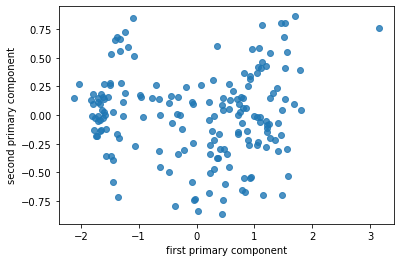

In [20]:
# 第一主成分と第二主成分でプロットする
plt.scatter(x=x_projected[:,0], y=x_projected[:,1], alpha=0.8)
plt.xlabel("first primary component")
plt.ylabel('second primary component')

In [23]:
# 寄与率の取得
# 寄与率：各PCが元データのどのくらいの情報を説明できるかという指標。
cumulative_contribution_ratio = pd.DataFrame(
    data=pca_object.explained_variance_ratio_,
    index=[f'PC{i+1}' for i in range(2)],
    columns=['cumulative_contribution_ratio']
)
cumulative_contribution_ratio

,cumulative_contribution_ratio
PC1,0.906437
PC2,0.093563


In [25]:
# 固有値
display(pd.DataFrame(
    data=pca_object.explained_variance_,
    index=[f'PC{i+1}' for i in range(2)],
    columns=['固有値']
))
# 固有ベクトル
display(pd.DataFrame(
    data=pca_object.components_,
    index=[f'PC{i+1}' for i in range(2)],
    columns=sample_col
))


,固有値
PC1,1.361292
PC2,0.140513


,flavanoids,od280/od315_of_diluted_wines
PC1,0.837961,0.545729
PC2,0.545729,-0.837961


# スクラッチでPrimary Components Analysis

In [30]:
# まずは第一主成分を導出する

# 相関行列
corr_matrix = df_X[sample_col].corr()
display(corr_matrix)

# 相関行列の固有値と固有ベクトルを算出
eig_val, eig_vec = np.linalg.eig(corr_matrix)
print(eig_val)
print(eig_vec)

# first primary componentの固有ベクトル
# 相関行列の固有ベクトルの第一列を、PCAでは「第一主成分の固有ベクトル」と言う。
eig_vec_pc1 = eig_vec[:, 0]
print(eig_vec_pc1)

# 第一主成分の主成分得点
pc1 = np.dot(df_X[sample_col], eig_vec_pc1)
print(pc1)


,flavanoids,od280/od315_of_diluted_wines
flavanoids,1.000000,0.787194
od280/od315_of_diluted_wines,0.787194,1.000000


[1.7871939 0.2128061]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[0.70710678 0.70710678]
[4.93560533 4.35577777 4.53255447 4.90732106 3.97394011 4.41234631
 4.31335137 4.3062803  4.12243253 4.73761543 4.58912301 3.7123106
 4.00222438 4.53962554 4.69518903 4.09414826 4.09414826 4.22142748
 4.77297077 4.51841233 4.86489465 4.19314321 4.86489465 4.24264069
 4.5466966  4.15778787 4.35577777 3.50724963 4.5042702  4.18607214
 4.21435642 4.29213816 3.9315137  4.05879292 3.81837662 4.56083874
 3.86080303 3.4931075  3.76887914 4.64569155 4.71640223 4.01636652
 5.03460028 3.98101118 4.49012806 4.22849855 4.67397582 4.75175757
 4.00929545 4.69518903 4.36991991 4.49719913 4.94974747 4.04465079
 4.31335137 4.1082904  4.46184379 4.29213816 4.62447835 1.68998521
 1.95161472 2.12132034 3.00520382 4.22142748 2.81428499 3.50017857
 4.49719913 3.87494516 2.2839549  3.0759145  2.00818326 4.25678282
 3.26683333 4.51841233 3.72645274 2.62336616 3.18905158 2.71529004
 2.94156421 4.01636652 3.8042

In [ ]:
# 続いて、PC2

# 相関行列から、PC1の影響を取り除いた相関行列2を作成する。
matrix = []
for d1 in eig_vec_pc1:
    mat = []
    for d2 in eig_vec_pc1:
        mat.append(d1 * d2)
    matrix.append(mat)
